## Imports

***

Let's import 3 packages which will be used throughout this notebook:

- [Pandas](https://pandas.pydata.org/docs/index.html) enables us to load tabular data (such as a csv file) as a Data Frame and perform analysis on the data.
- [Numpy](https://numpy.org/) enables us to store data as arrays and process these in a performant manner.
- [Matplotlib.pyplot](https://matplotlib.org/stable/api/pyplot_summary.html) enables us to create visualizations such as bar charts, histograms and scatterplots.

In [1]:
# Import pandas, matplotlib.pyplot and numpy packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Load & Overview

***

The [UCI machine learning repository](https://archive.ics.uci.edu/dataset/53/iris) does not come in the easiest format to interact with the data. Instead we have downloaded a copy of the data set from the [Seaborn repository](https://github.com/mwaskom/seaborn-data/blob/master/iris.csv).

In [53]:
# Create a pandas DataFrame from the iris.csv file (sourced from the Seaborn Repository linked above).
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv
df = pd.read_csv('iris.csv')

The data is now loaded and we can generate an overview by printing the Data Frame to our console. (The Data Frame is truncated to display the first 5 and last 5 records)

In [57]:
# Let's have an initial look. 
# https://pandas.pydata.org/docs/user_guide/dsintro.html#console-display
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


We can see from the above table there are 150 rows (records), each representing an individual flower, and 5 columns (variables). Of the 5 columns, 1 is categorical (species) and the rest are numeric. Next, let's generate descriptive statistics on the numeric variables, and print the summary to a single text (.csv) file.

In [60]:
# Describe the data set and print the output to 'variable_summary.csv'
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html
df.describe().to_csv('variable_summary.csv')
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualizations

***

#### Histograms

Histograms are suitable for visualizing continuous distributions. Let's visualise our data using histograms to display:
1. The distribution of the sepal lengths, sepal widths, petal lengths and petal widths.
2. Same as (1) but categorised by Iris species.

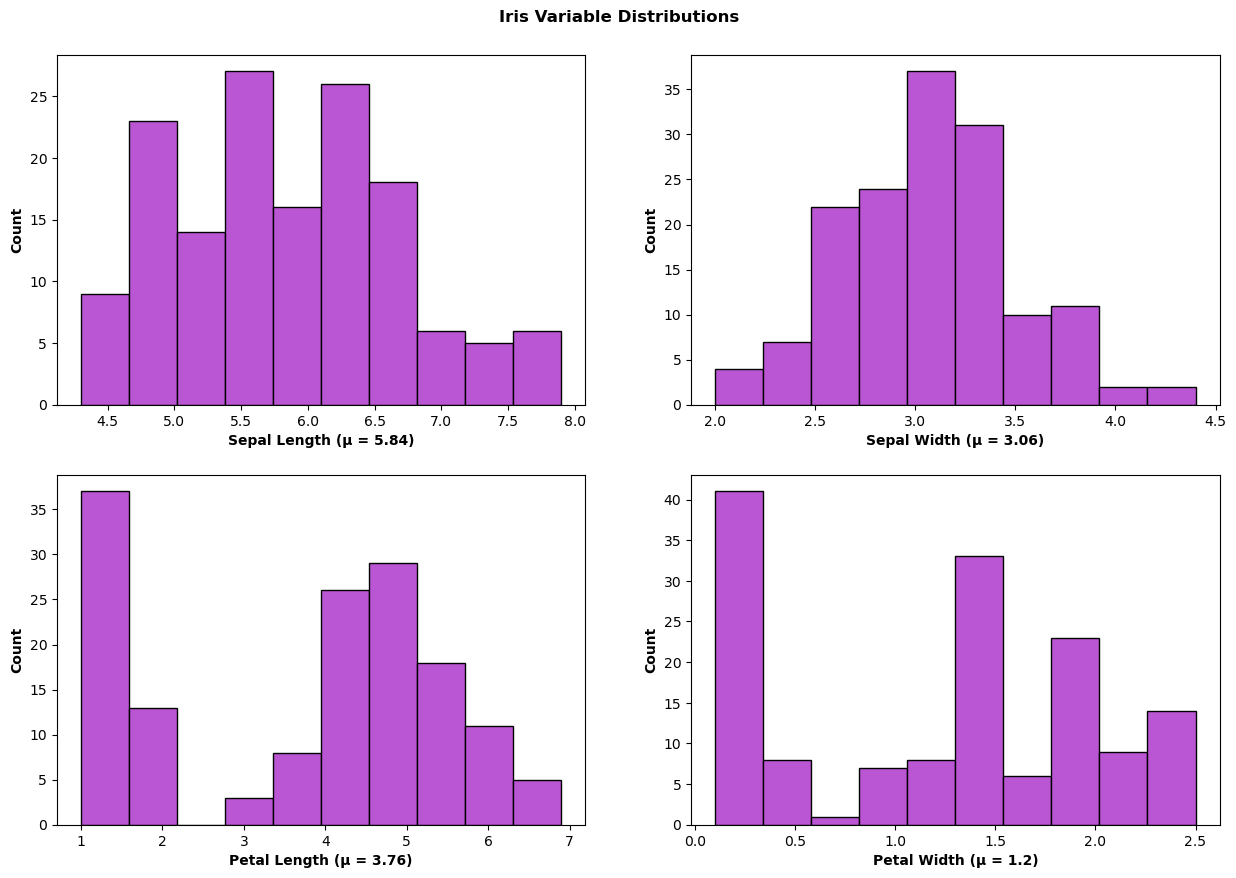

In [150]:
# Create a new figure and sets of axes, split into 2 rows and 2 columns.
fig, ax = plt.subplots(2,2)

# Set figure title & size.
fig.suptitle('Iris Variable Distributions', y=.925,fontweight = 900)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plot histograms of the four variables.
ax[0,0].hist(df["sepal_length"], edgecolor='black', color="mediumorchid")
ax[0,1].hist(df["sepal_width"], edgecolor='black', color="mediumorchid")
ax[1,0].hist(df["petal_length"], edgecolor='black', color="mediumorchid")
ax[1,1].hist(df["petal_width"], edgecolor='black', color="mediumorchid")

# Set axis labels for four subplots.
ax[0,0].set_xlabel("Sepal Length (μ = 5.84)", fontweight = 550)
ax[0,0].set_ylabel("Count", fontweight = 550)
ax[0,1].set_xlabel("Sepal Width (μ = 3.06)", fontweight = 550)
ax[0,1].set_ylabel("Count", fontweight = 550)
ax[1,0].set_xlabel("Petal Length (μ = 3.76)", fontweight = 550)
ax[1,0].set_ylabel("Count", fontweight = 550)
ax[1,1].set_xlabel("Petal Width (μ = 1.2)", fontweight = 550)
ax[1,1].set_ylabel("Count", fontweight = 550)

# Save to png
plt.savefig('Iris_dist.png')

To visualise the above categorised by species, we first need to create DataFrames for the distinct species: 

In [120]:
# Create subset dataframes for the different species
setosa_df = df[df["species"].str.contains("setosa")]
versicolor_df = df[df["species"].str.contains("versicolor")]
virginica_df = df[df["species"].str.contains("virginica")]

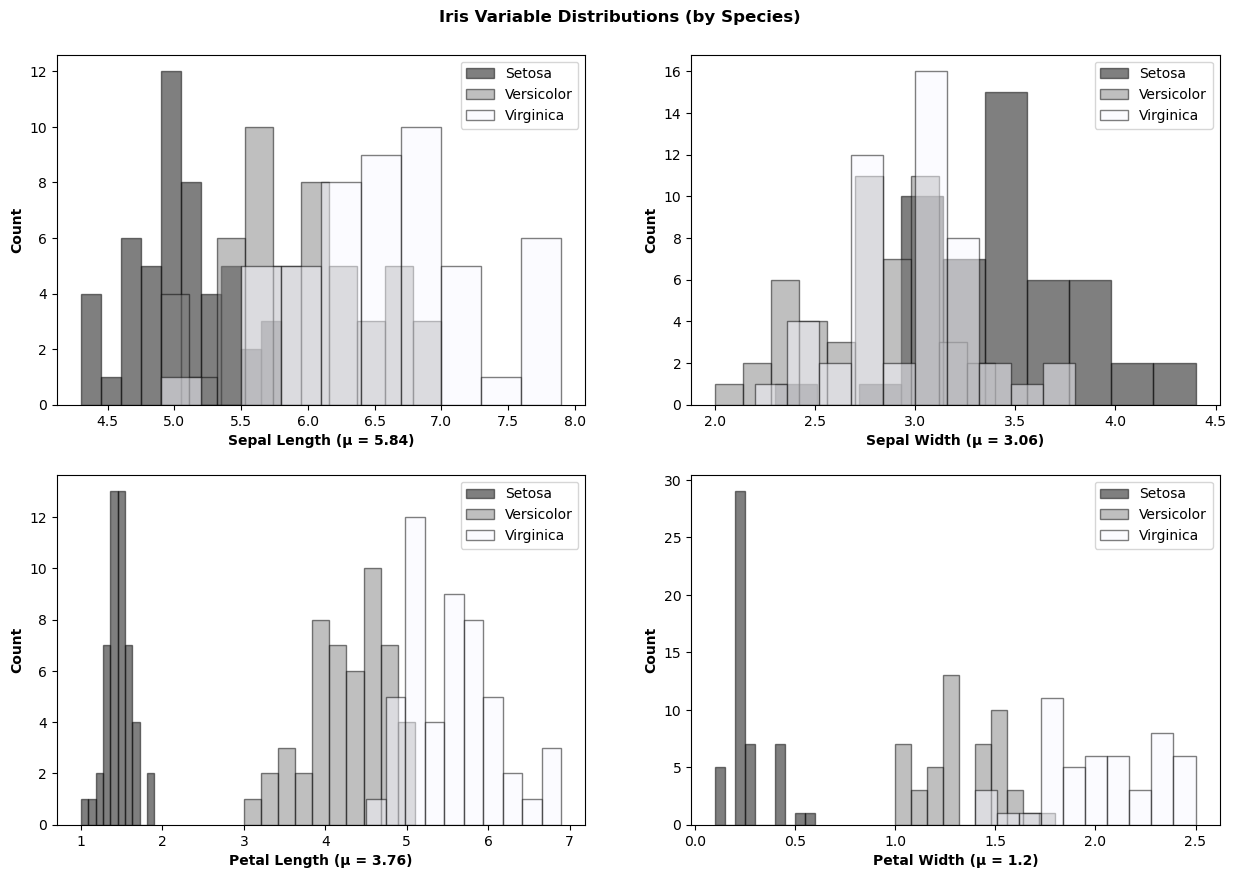

In [151]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html
# https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text.set_fontweight


# Create a new figure and sets of axes, split into 2 rows and 2 columns.
fig, ax = plt.subplots(2,2)

# Set figure title & size
fig.suptitle('Iris Variable Distributions (by Species)',y=.925,fontweight = 900)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plot histograms of the four variables by species, each subplot has three histograms overlayed on each other.
# https://www.geeksforgeeks.org/overlapping-histograms-with-matplotlib-in-python/
ax[0,0].hist(setosa_df["sepal_length"], edgecolor='black', color="black", alpha=0.5)
ax[0,0].hist(versicolor_df["sepal_length"], edgecolor='black', color="grey", alpha=0.5)
ax[0,0].hist(virginica_df["sepal_length"], edgecolor='black', color="ghostwhite", alpha=0.5)
ax[0,1].hist(setosa_df["sepal_width"], edgecolor='black', color="black", alpha=0.5)
ax[0,1].hist(versicolor_df["sepal_width"], edgecolor='black', color="grey", alpha=0.5)
ax[0,1].hist(virginica_df["sepal_width"], edgecolor='black', color="ghostwhite", alpha=0.5)
ax[1,0].hist(setosa_df["petal_length"], edgecolor='black', color="black", alpha=0.5)
ax[1,0].hist(versicolor_df["petal_length"], edgecolor='black', color="grey", alpha=0.5)
ax[1,0].hist(virginica_df["petal_length"], edgecolor='black', color="ghostwhite", alpha=0.5)
ax[1,1].hist(setosa_df["petal_width"], edgecolor='black', color="black", alpha=0.5)
ax[1,1].hist(versicolor_df["petal_width"], edgecolor='black', color="grey", alpha=0.5)
ax[1,1].hist(virginica_df["petal_width"], edgecolor='black', color="ghostwhite", alpha=0.5)

# Set axis labels & legends for four subplots.
ax[0,0].set_xlabel("Sepal Length (μ = 5.84)", fontweight = 550)
ax[0,0].set_ylabel("Count", fontweight = 550)
ax[0,0].legend(['Setosa','Versicolor','Virginica'])
ax[0,1].set_xlabel("Sepal Width (μ = 3.06)", fontweight = 550)
ax[0,1].set_ylabel("Count", fontweight = 550)
ax[0,1].legend(['Setosa','Versicolor','Virginica'])
ax[1,0].set_xlabel("Petal Length (μ = 3.76)", fontweight = 550)
ax[1,0].set_ylabel("Count", fontweight = 550)
ax[1,0].legend(['Setosa','Versicolor','Virginica'])
ax[1,1].set_xlabel("Petal Width (μ = 1.2)", fontweight = 550)
ax[1,1].set_ylabel("Count", fontweight = 550)
ax[1,1].legend(['Setosa','Versicolor','Virginica'])

# Save to png
plt.savefig('Iris_dist_by_species.png')

## End

***